In [1]:
import pandas as pd
import seaborn as sns

is_refreshed = False

In [ ]:
is_refreshed = True

In [2]:
import sys
sys.path.append('../')

In [3]:
import os.path
if not os.path.isfile('../merged_data/sleep_activity_converted.csv'):
    sleep = pd.read_csv("../original_data/sleep_timestamp_eff.csv")
    activity = pd.read_csv("../original_data/activity.csv")
    sleep_activity = pd.merge(sleep, activity, left_on=['egoid', 'dataDate'], right_on=['egoid', 'datadate'] )
    sleep_activity.to_csv('../merged_data/sleep_activity_converted.csv', index=False)
else:
    print('merged data exists')

merged data exists


In [4]:
# from  scripts.displot.displot import display_displot
def display_displot(data: pd.DataFrame):    
    for index, column in enumerate(data.columns):
        if index > 1 and not (column == 'egoid' or column == 'dataDate' or column == 'datadate'):
            sns.displot(data, x=column)

In [5]:
if is_refreshed:
    sleep_activity = pd.read_csv('..\merged_data\sleep_activity_converted.csv')
    sleep_activity.head()

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,...,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,10237,2018-08-31,82950,27030.0,509,2,0,495,12,97,...,57.0,95.0,601,178,5,0,1017.74840,1334.7117,68.280960,0.00000
1,10237,2016-08-28,48510,52170.0,62,2,0,60,0,100,...,49.0,60.0,1221,172,8,0,2009.41000,1143.8047,75.658302,0.00000
2,10237,2016-08-28,85440,29520.0,509,7,0,486,16,96,...,49.0,60.0,1221,172,8,0,2009.41000,1143.8047,75.658302,0.00000
3,10237,2016-08-27,85050,27510.0,482,2,0,476,4,99,...,7.0,8.0,644,18,0,0,858.53564,100.4643,0.000000,0.00000
4,10237,2016-08-26,81150,27930.0,554,2,0,540,12,97,...,48.0,100.0,1158,242,2,1,2106.40160,1646.7463,25.922270,3.22478


C:\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


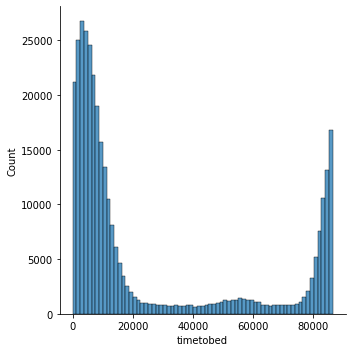

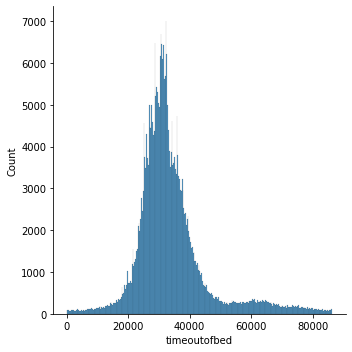

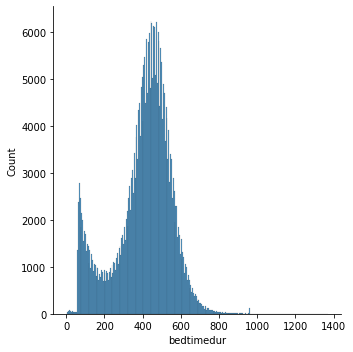

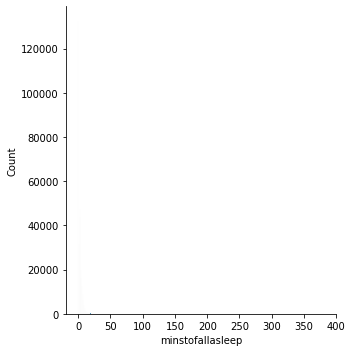

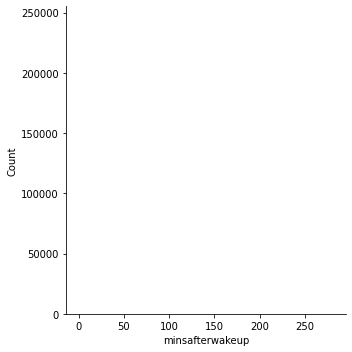

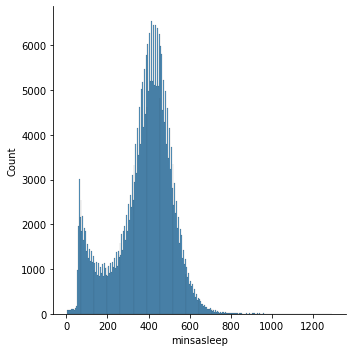

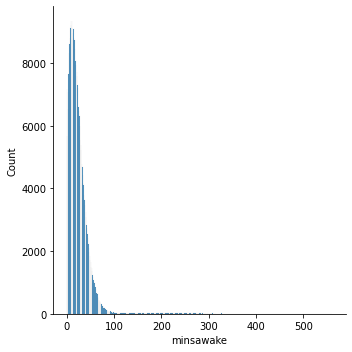

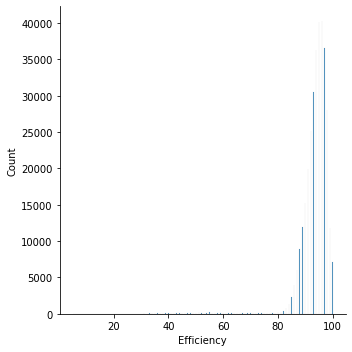

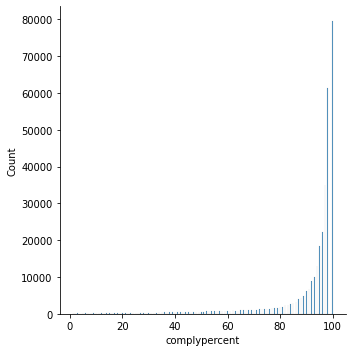

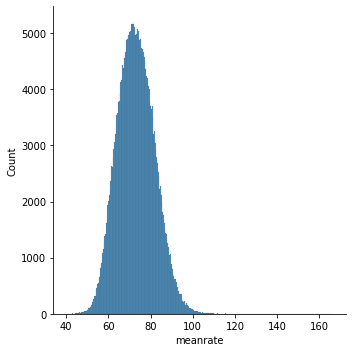

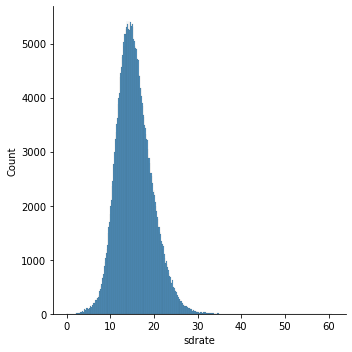

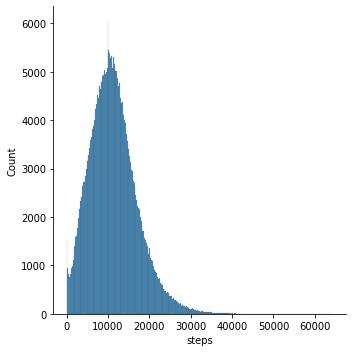

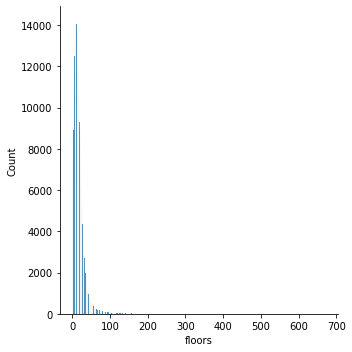

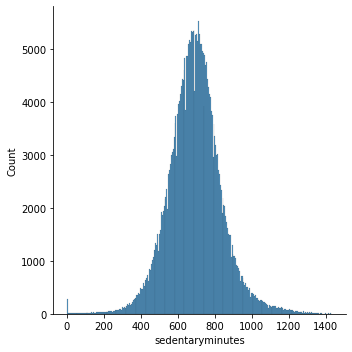

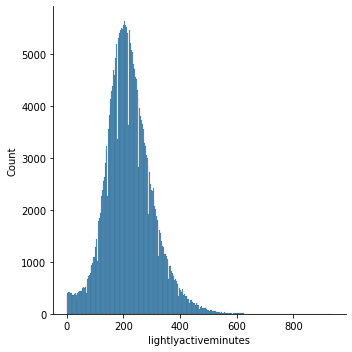

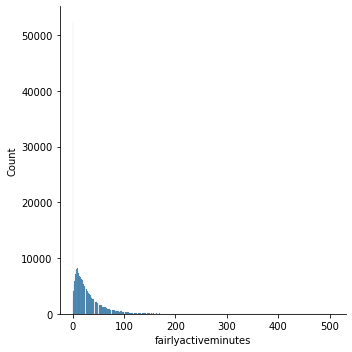

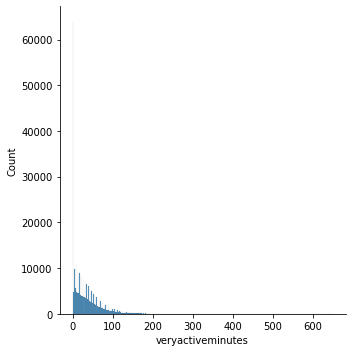

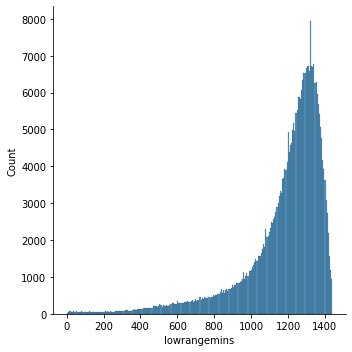

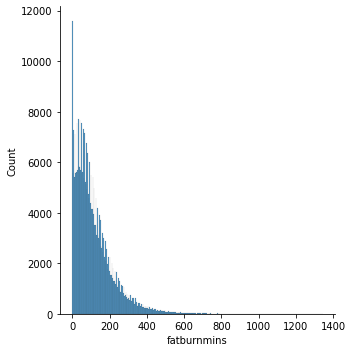

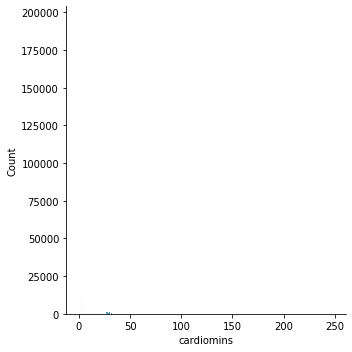

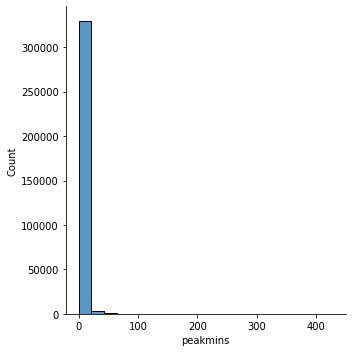

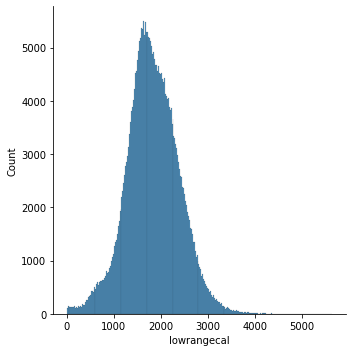

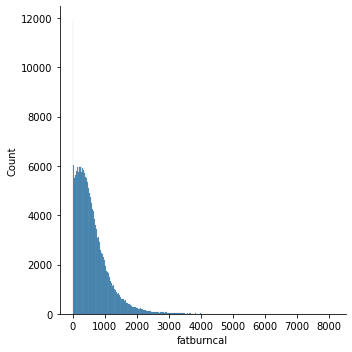

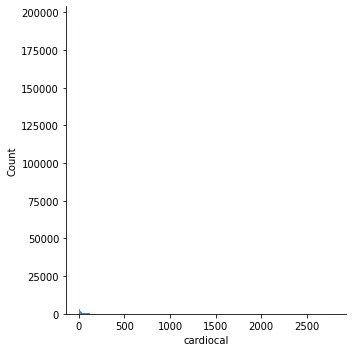

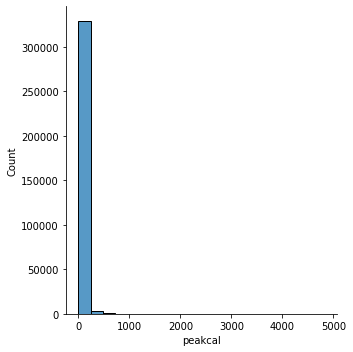

In [6]:
if is_refreshed:
    display_displot(sleep_activity)

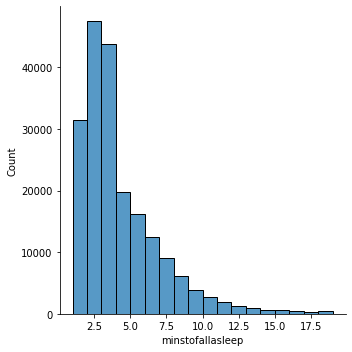

In [7]:
if is_refreshed:
    filtered_minsasleep = sleep_activity['minstofallasleep'
        ][(sleep_activity['minstofallasleep'] > 0) & (sleep_activity['minstofallasleep'] < 20)]

    # print(filtered_minsasleep.value_counts())
    sns.displot(filtered_minsasleep, bins=[i for i in range(1,20)])

In [25]:
from scipy import stats

def test_normality(data: pd.DataFrame):
    alpha = 1e-3
    for index, column in enumerate(data.columns):
        if not (column == 'egoid' or column == 'dataDate' or column == 'datadate'):
            if index < 3 or True:
                k2, p = stats.normaltest(data[column])
                if p < alpha:
                    print(column, 'is normal with p', p, 'and k', k2)
                else:
                    print(column, 'is not normal with p', p, 'and k', k2)


In [26]:

test_normality(sleep_activity)

timetobed is normal with p 0.0
timeoutofbed is not normal with p nan
bedtimedur is normal with p 0.0
minstofallasleep is normal with p 0.0
minsafterwakeup is normal with p 0.0
minsasleep is normal with p 0.0
minsawake is normal with p 0.0
Efficiency is normal with p 0.0
complypercent is normal with p 0.0
meanrate is normal with p 0.0
sdrate is normal with p 0.0
steps is not normal with p nan
floors is not normal with p nan
sedentaryminutes is not normal with p nan
lightlyactiveminutes is not normal with p nan
fairlyactiveminutes is not normal with p nan
veryactiveminutes is not normal with p nan
lowrangemins is normal with p 0.0
fatburnmins is normal with p 0.0
cardiomins is normal with p 0.0
peakmins is normal with p 0.0
lowrangecal is normal with p 0.0
fatburncal is normal with p 0.0
cardiocal is normal with p 0.0
peakcal is normal with p 0.0
